In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [125]:
# Get data
data = pd.read_csv('../resources/data/data_fred.csv')
transformations = data.iloc[0]
data.drop(index=0, axis=0, inplace=True)

# Set date as index of df
data['sasdate'] = pd.to_datetime(data['sasdate'])
data.set_index('sasdate', inplace=True)
data.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6250,23.4581,22.1904,32.4078,21.9882,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2043,NaN
1959-02-01,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0681,23.7747,22.3827,32.6455,22.1036,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5280,NaN
1959-03-01,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4004,23.9186,22.4925,32.6455,22.5365,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6405,NaN
1959-04-01,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8989,24.2641,22.8221,33.1606,22.6807,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8099,NaN
1959-05-01,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2589,24.4655,23.0418,33.3190,23.1424,...,11.454,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7315,NaN


In [115]:
def transform_series(code, series):
    # Codes correspond the following transformations:
    # 1: No transformation
    # 2: first difference
    # 3: second difference
    # 4: log
    # 5: log first difference
    # 6: log second difference
    # 7: first difference of log ratio

    if code == 1:
        return series
    elif code == 2:
        return series.diff()
    elif code == 3:
        return series.diff().diff()
    elif code == 4:
        return np.log(series)
    elif code == 5:
        return np.log(series).diff()
    elif code == 6:
        return np.log(series).diff().diff()
    elif code == 7:
        return (series.diff()/series.shift(1)).diff()
    else:
        raise ValueError('Transformation code not recognized')

In [126]:
print(data.shape)

# Transform data
for i, code in enumerate(transformations):
    if i > 0:
        print(i)
        data.iloc[:, i] = transform_series(code, data.iloc[:, i])

(733, 128)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128


c:\Users\Vincent\Anaconda3New\envs\thesis\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IndexError: single positional indexer is out-of-bounds

In [12]:
# Check missing values
data.isna().sum().sort_values(ascending=False)

to_drop = list(data.isna().sum().sort_values(ascending=False).index[:5])

print("Dropping{}".format(to_drop))
data_clean = data.drop(columns=to_drop)

data_clean.head()

Dropping['ACOGNO', 'TWEXMMTH', 'UMCSENTx', 'ANDENOx', 'VXOCLSx']


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6250,23.4581,22.1904,32.4078,21.9882,...,56.918,17.791,11.358,2.13,2.45,2.04,274.9,6476.0,12298.0,84.2043
1959-02-01,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0681,23.7747,22.3827,32.6455,22.1036,...,56.951,17.798,11.375,2.14,2.46,2.05,276.0,6476.0,12298.0,83.5280
1959-03-01,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4004,23.9186,22.4925,32.6455,22.5365,...,57.022,17.785,11.395,2.15,2.45,2.07,277.4,6508.0,12349.0,81.6405
1959-04-01,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8989,24.2641,22.8221,33.1606,22.6807,...,57.080,17.796,11.436,2.16,2.47,2.08,278.1,6620.0,12484.0,81.8099
1959-05-01,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2589,24.4655,23.0418,33.3190,23.1424,...,57.175,17.777,11.454,2.17,2.48,2.08,280.1,6753.0,12646.0,80.7315


In [27]:
# Fill missing values with last valid observation
data_noNA = data_clean.dropna()
print(data_noNA.isna().sum().sum())


0


(717, 2)


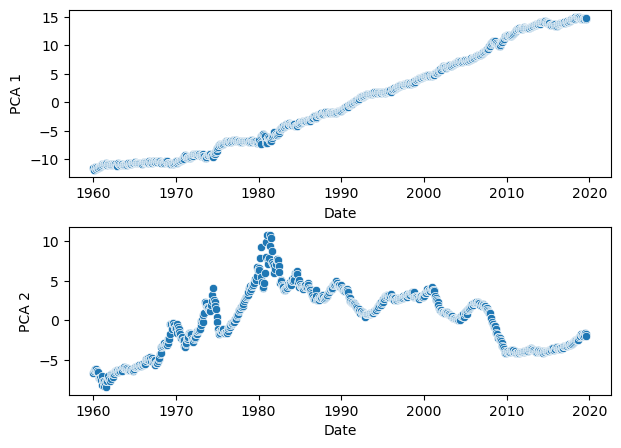

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_noNA)

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(data_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(data_scaled)

# Print the shape of pca_features
print(pca_features.shape)

# Increased spacing between subplots
fig, ax = plt.subplots(2,1,figsize=(7,5))
plt.subplots_adjust(hspace=0.3)

# Add x and y label for both plots
ax[0].set_xlabel('Date')
ax[0].set_ylabel('PCA 1')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('PCA 2')

for i in range(2):
    sns.scatterplot(x = data_noNA.index, y=pca_features[:,i], ax=ax[i])

In [1]:
# Prediction
# Predicting 1 steps ahead
h = 1



NameError: name 'data_noNA' is not defined

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

def predict_pca(data, h_steps=1, response='CPIAUCSL', test_start='1985-01-01'):
    # Split into train and test sets with train ending at december 1984
    initial_train = data[:test_start]
    initial_test = data[test_start:]

    T_train = initial_train.shape[0]
    T_test = initial_test.shape[0]
    T = data.shape[0]

    # Split into X and y
    X = data.drop(columns=response)
    y = data[response]

    # Shift y by h steps
    y = y.shift(h_steps)

    # Initialize the list of MSE's
    mse = []

    # t is where the test set starts
    for t in range(T_train, T):

        # Split into X and y, dropping first h rows from training data to account for the shift
        X_train, y_train = X[h_steps:t], y[h_steps:t]
        X_test, y_test = X[t:(t + h_steps)], y[t:(t + h_steps)]

        # Drop the first h rows from training data
        X_train = X_train[h_steps:]
        y_train = y_train[h_steps:]

        # Standardize the features 
        scaler = StandardScaler()

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Scale the features by the slope of the regression line
        X_train = scale_X(X_train, y_train)

        # Apply PCA to the features
        pca = PCA(n_components=5)
        pca.fit(X_train)

        # Transform the training and test sets
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Fit the model to the training data
        model = LinearRegression()
        model.fit(X_train_pca, y_train)

        # Make predictions 1 step ahead
        y_pred = model.predict(X_test_pca)

        print(y_pred, y_test)
        # Compute the MSE
        mse.append(MSE(y_test, y_pred))

    return mse

def scale_X(X_train, y_train):
    X_train = X_train.copy()
    slopes = []

    for i in range(X_train.shape[1]):
        # Seperate the predictor from the rest of the data
        X_predictor = X_train[:,i].reshape(-1, 1)

        # Fit the model
        lr = LinearRegression(fit_intercept=True)
        lr.fit(X_predictor, y_train)

        # Obtain the slope coefficient which is the beta
        slope = lr.coef_
        slopes.append(slope)

    for i, slope in enumerate(slopes):
        X_train[:,i] = X_train[:,i] * slope

    return X_train



In [111]:
mse_list = predict_pca(data_noNA, 1)
print("Mean MSE:", np.mean(mse_list))

[54.89572632] sasdate
1985-02-01    105.7
Name: CPIAUCSL, dtype: float64
[55.10968428] sasdate
1985-03-01    106.3
Name: CPIAUCSL, dtype: float64
[55.27417516] sasdate
1985-04-01    106.8
Name: CPIAUCSL, dtype: float64
[55.44999387] sasdate
1985-05-01    107.0
Name: CPIAUCSL, dtype: float64
[55.61589274] sasdate
1985-06-01    107.2
Name: CPIAUCSL, dtype: float64
[55.78870798] sasdate
1985-07-01    107.5
Name: CPIAUCSL, dtype: float64
[55.96371062] sasdate
1985-08-01    107.7
Name: CPIAUCSL, dtype: float64
[56.15138042] sasdate
1985-09-01    107.9
Name: CPIAUCSL, dtype: float64
[56.33453339] sasdate
1985-10-01    108.1
Name: CPIAUCSL, dtype: float64
[56.49899831] sasdate
1985-11-01    108.5
Name: CPIAUCSL, dtype: float64
[56.6932874] sasdate
1985-12-01    109.0
Name: CPIAUCSL, dtype: float64
[56.8550641] sasdate
1986-01-01    109.5
Name: CPIAUCSL, dtype: float64
[57.0201925] sasdate
1986-02-01    109.9
Name: CPIAUCSL, dtype: float64
[57.17387565] sasdate
1986-03-01    109.7
Name: CPIAUC

In [101]:
# Split into train and test sets with train ending at december 1984
initial_train = data_noNA[:'1985-01-01']
y_train = initial_train['CPIAUCSL']

new_X = scale_X(initial_train, y_train)
print(new_X.shape)

(301, 123)
